Name: Safa Demirhan

ID: 171101070

Course: BIL570 /BIL470

### **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

from LR import *

# **Exploratory Data Analysis (EDA)**

### **Read Dataset and Preprocess**

In [2]:
bmi = pd.read_csv('dataset.csv')
bmi = bmi.drop(columns='Gender')

 ### **Data Description**

In [3]:
bmi.head()

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3


In [4]:
bmi.shape

(500, 3)

In [5]:
print(bmi['Height'])
print(bmi['Weight'])
print(bmi['Index'])

0      174
1      189
2      185
3      195
4      149
      ... 
495    150
496    184
497    141
498    150
499    173
Name: Height, Length: 500, dtype: int64
0       96
1       87
2      110
3      104
4       61
      ... 
495    153
496    121
497    136
498     95
499    131
Name: Weight, Length: 500, dtype: int64
0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64


In [6]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  500 non-null    int64
 1   Weight  500 non-null    int64
 2   Index   500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB


In [7]:
bmi.isna().sum()

Height    0
Weight    0
Index     0
dtype: int64

In [8]:
bmi.isnull().any()

Height    False
Weight    False
Index     False
dtype: bool

### **Pair-Plot and Correlation Matrix Plots**

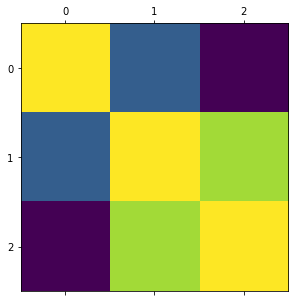

In [9]:
plt.matshow(bmi.corr())
plt.show()

AxesSubplot(0.125,0.125;0.62x0.755)


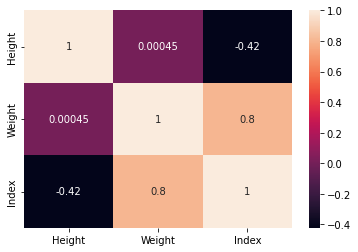

In [10]:
print(sns.heatmap(bmi.corr(), annot=True))

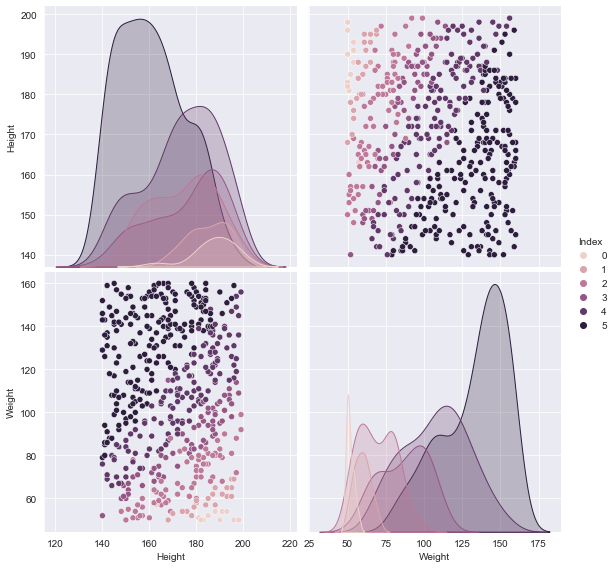

In [11]:
sns.set_style('darkgrid')
sns.pairplot(bmi,hue='Index', height=4)
plt.show()

### **Graphs for each group "Index"**

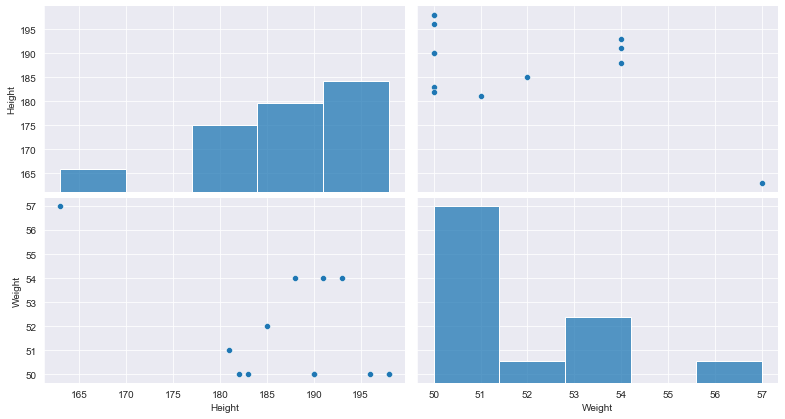

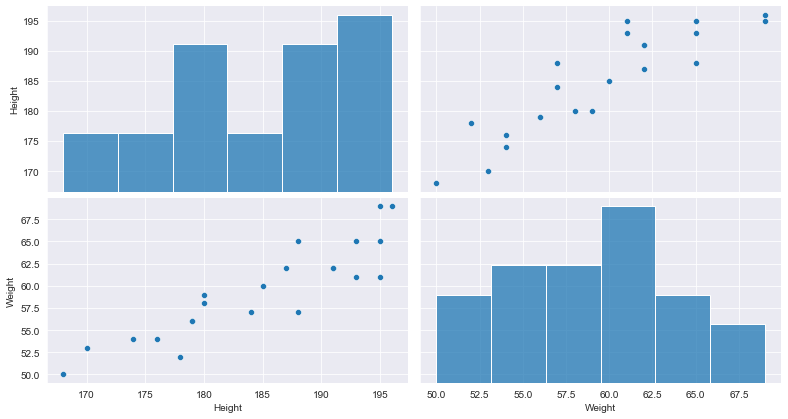

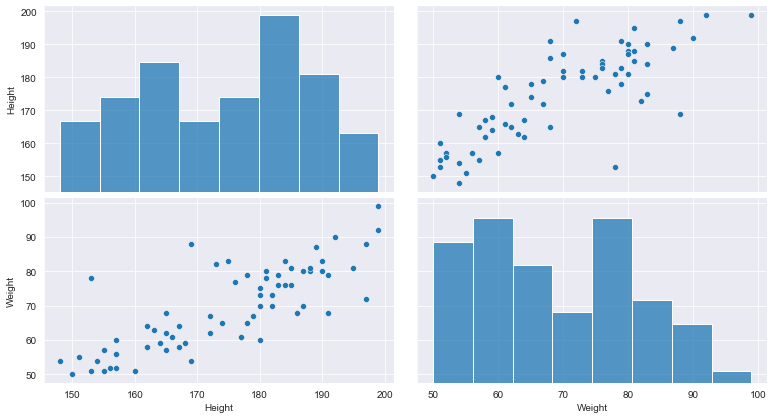

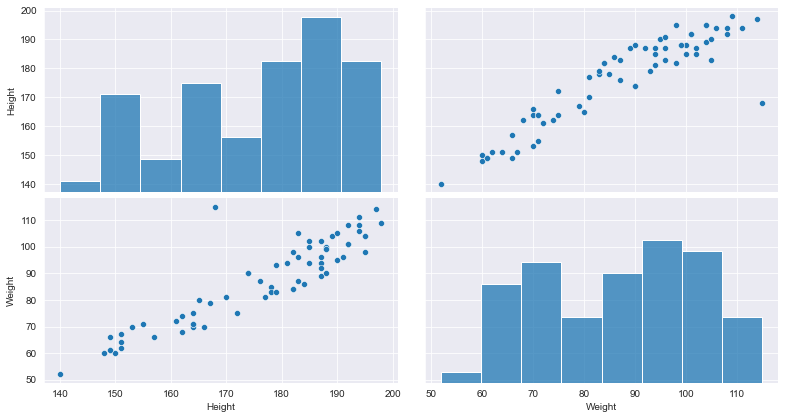

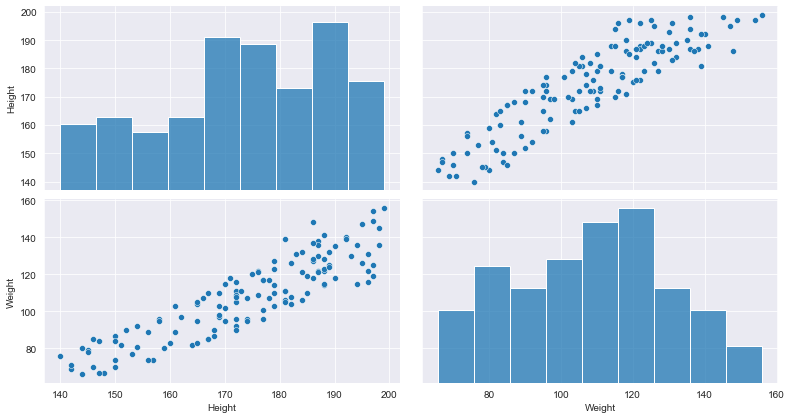

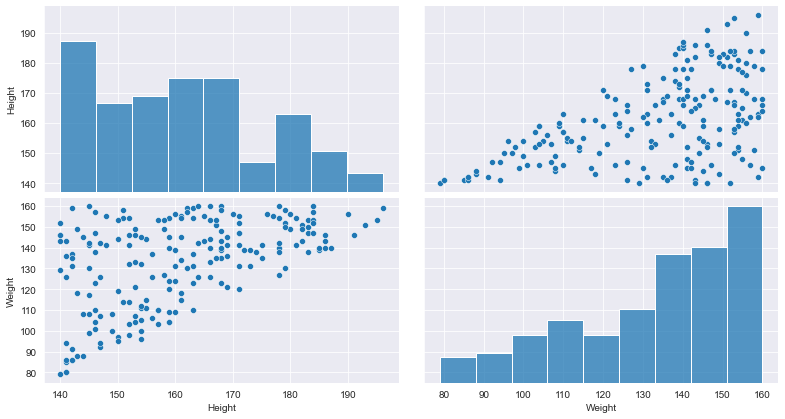

In [12]:
index_values = bmi['Index'].unique()
index_values
for i, vel in enumerate(set(index_values)):
    g = sns.pairplot(bmi[bmi['Index'] == vel][['Height', 'Weight']])
    g.fig.set_size_inches(12, 6)
    plt.show()

### **Scatter plot showing different categories for all points in data**

C:\Users\Safa Demirhan\anaconda3\envs\hw1\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


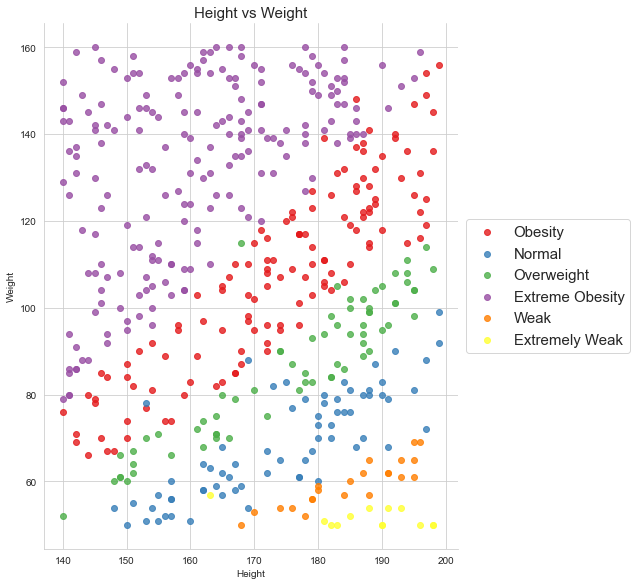

In [13]:
data_visual = pd.read_csv('dataset.csv')

def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
data_visual['Status'] = data_visual.apply(convert_status_to_description,axis=1)

def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
data_visual['gender_lbl'] = data_visual.apply(convert_gender_to_label,axis=1)
data_visual.head()

sns.set_style('whitegrid')
sns.lmplot( x='Height', y='Weight', data=data_visual, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

### **3-D Scatter plot to differentiate b/w male and female**

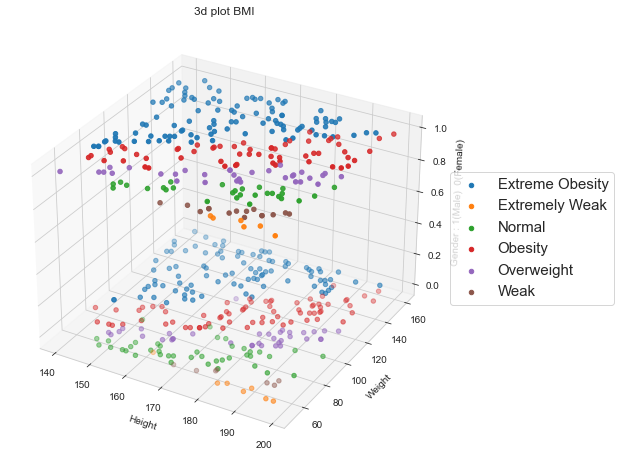

In [14]:
groups = data_visual.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)')
ax.set_title('3d plot BMI')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

# **Train the classifier**

In [15]:
# Bu cell'de veri list'e donusturuluyor ancak regresyon kodumda dot product
# kullanmam gerektigi icin ve numpy'siz kendi yazdigim dot() calismadigi icin
# test amacli veriyi list'e donusturmeden kullandigim kisim burasidir.
# List'e donusturdugum halini de yorum satirli olarak koyacagim.

x = bmi.iloc[:,:-1].values.tolist()
y = bmi.iloc[:,-1].values.tolist()

sc = StandardScaler()
x = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=50)

z_train = np.zeros(X_train.shape[1])

w, b, c = fit(X_train, y_train, z_train, learning_rate = 0.002, epochs=15000)
y_pred = predict(X_test, w, b)

# w2, b2, c2 = fit(X_train, y_train, z_train, 0.002, epochs=15000)
# y_train_pred = predict(X_train, w2, b2)

Cost is: 8.055884194090375
Cost is: 0.18854556413720452
Cost is: 0.1706895651958496
Cost is: 0.1706482397684801
Cost is: 0.17064814198584222
Cost is: 0.17064814174877768
Cost is: 0.17064814174818788
Cost is: 0.17064814174818643
Cost is: 0.1706481417481865
Cost is: 0.17064814174818638


##### commented out for dot() to work

In [16]:
# Bu kisimda veriyi list'e donusturup kullaniyorum, dot() yuzunden calismiyor bu hali.

# x = bmi.iloc[:,:-1].values.tolist()
# y = bmi.iloc[:,-1].values.tolist()

# sc = StandardScaler()
# x = sc.fit_transform(x)

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=42)

# z_train = np.zeros(X_train.shape[1])
# z_train = z_train.tolist();

# X_train = X_train.tolist();
# X_test = X_test.tolist();

# w, b, c = fit(X_train, y_train, z_train, learning_rate = 0.000005, epochs=15000)
# y_pred = predict(X_test, w, b)
# print('r2 score is', r2score(y_pred, y_test))
# print('rmse is ', rmse(y_pred, y_test))

# w2, b2, c2 = fit(X_train, y_train, z_train, 0, 0.002,epochs=15000)
# y_train_pred = predict(X_train, w2, b2)
# print('TRAIN r2 score is', r2score(y_train_pred, y_train))
# print('TRAIN rmse is ', rmse(y_train_pred, y_train))

# plt.title('Cost Plot')
# plt.plot(c)

# **Results**

### **Loss & Accuracy Plot**

### **Accuracy Rsquare**

r2 score is 0.8354629321547188
rmse is  0.5449757990374727


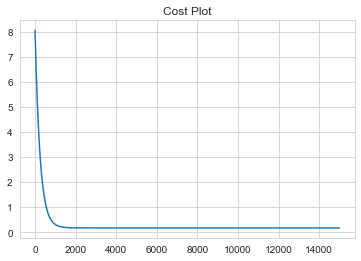

In [17]:
print('r2 score is', r2_score(y_test, y_pred))
print('rmse is ', mean_squared_error(y_test, y_pred, squared=False))

# print('TRAIN r2 score is', r2_score(y_train, y_train_pred))
# print('TRAIN rmse is ', mean_squared_error(y_train, y_train_pred))

plt.title('Cost Plot')
plt.plot(c)